In [2]:
import pandas as pd
from matplotlib import rcParams
from matplotlib.ticker import FuncFormatter
import numpy as np
import matplotlib.pyplot as plt

def convert_to_float(value):
    return float(value.replace("ms", "")) if isinstance(value, str) else value

file_path = '../../output/5_5/5_5_preprocess.xlsx'
preprocess_df = pd.read_excel(file_path, sheet_name='Results')

rcParams["font.size"] = 16
rcParams["font.family"] = "Times New Roman"
rcParams["text.usetex"] = True
rcParams["font.family"] = "serif"


xls = "../../output/5_5/5_5_results.xlsx" 
df = pd.read_excel(xls, sheet_name="Results")
df.set_index("Method", inplace=True)

preprocess_df.iloc[:, 1:] = preprocess_df.iloc[:, 1:].replace("ms", "", regex=True).astype(float)
df.iloc[:, 1:] = df.iloc[:, 1:].replace("ms", "", regex=True).astype(float)

print(df.iloc[0, 6])


0.167


[0.9995826742335074, 0.9958423581547041, 0.9599232061435086, 0.7054673721340388, 0.1932367149758454, 0.023391812865497075]
[3.98784219e+03 3.88048312e+03 2.98368232e+03 4.44662368e+02
 6.82344871e+00 1.32559014e+00]


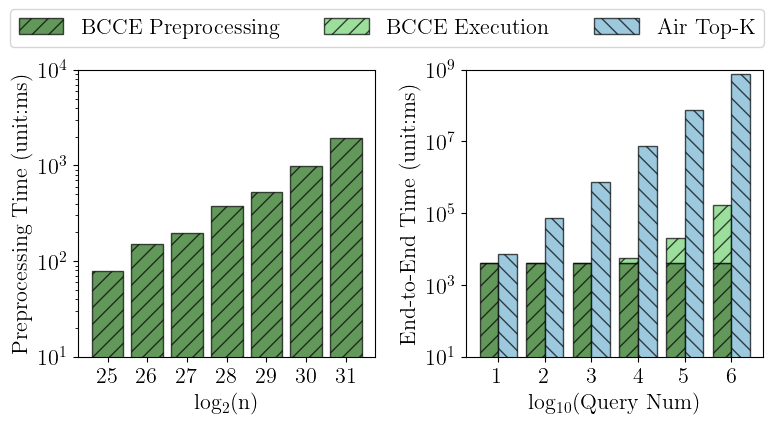

In [ ]:

fig, axs = plt.subplots(1, 2, figsize=(8, 4))

preprocess_color = "#216c16"

# figure 1
x_labels = np.arange(4, 11).astype(str)  # 生成 4 到 10 的横坐标
methods = ["preprocess_v1"]
bar_width = 0.8
ax = axs[0]
x = np.arange(len(x_labels))

for i, method in enumerate(methods):
    bars = ax.bar(x + i * bar_width, preprocess_df.iloc[i + 1, 5:12], width=bar_width, color=preprocess_color,  hatch="//", edgecolor="black", alpha=0.7)

ax.set_yscale("log")
ax.set_ylim(10**1, 10**4)
ax.set_xlabel('log$_2$(n)')
ax.set_ylabel("Preprocessing Time (unit:ms)")
ax.set_xticks(x + (len(methods) - 1) * bar_width / 2)
ax.set_xticklabels([int(x) + 21 for x in x_labels])  # 先转换为 int，再进行 +1 操作


# figure 2
ax = axs[1]
query_nums = [10, 100, 1000, 10000, 100000, 1000000]
x = np.arange(len(query_nums)) 
y = [preprocess_df.iloc[1, 12] + df.iloc[0, 6] * q for q in query_nums]
airtopk_latency = [df.iloc[1, 6] * q for q in query_nums]
bar_width = 0.4  # 设置柱子宽度
x_positions = np.arange(len(query_nums)) # 生成等距的横坐标
color_blue = "#72b3d0"  # BCCE 的颜色
color_green = "#72d072"  # baseline 的颜色
preprocess_time = preprocess_df.iloc[1, 12]
execution_times = [df.iloc[0, 6] * q for q in query_nums]
total_times = [preprocess_time + exec_time for exec_time in execution_times]
portition = [preprocess_time / total_time for total_time in total_times]
print(portition)

import numpy as np
portition = np.array(portition)
total_times = np.array(total_times)
print(np.power(10, portition * np.log10(total_times)))
ax.bar(x_positions - bar_width / 2, 
    # np.power(10, portition * np.log10(total_times)), 
       [preprocess_time], 
       width=bar_width, 
       label="BCCE Preprocessing", 
       color=preprocess_color,
       edgecolor="black", 
       hatch="//",
       alpha=0.7)

ax.bar(x_positions - bar_width / 2, 
       execution_times, 
       width=bar_width, 
       bottom=[preprocess_time], 
    #    bottom=np.power(10, portition * np.log10(total_times)), 
       label="BCCE Execution", 
       color=color_green, 
       hatch="//",
       edgecolor="black", 
       alpha=0.7)

ax.bar(x_positions + bar_width/2, 
       airtopk_latency, 
       width=bar_width, 
       label="Air Top-K", 
       color=color_blue, 
       hatch='\\\\', 
       edgecolor="black", 
       alpha=0.7)

ax.set_yscale("log")
ax.set_ylim(10**1, 10**9)
ax.set_xlabel('log$_{10}$(query num)')
ax.set_ylabel("End-to-End Time (unit:ms)")
xtick_labels = [str(n) for n in np.arange(len(query_nums)) + 1]
ax.set_xticks(x)
ax.set_xticklabels(xtick_labels)


handles, labels = ax.get_legend_handles_labels()
fig.legend(handles, labels, ncol=3, bbox_to_anchor=(0.185, 1.0, 0.8, 0.1))

plt.tight_layout()  # 自动调整布局
plt.savefig("5_5_extra.pdf", bbox_inches="tight")
plt.show()